In [3]:
import numpy as np
import pandas as pd


In [4]:
df=pd.read_csv("car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#Feature Engineering
Dropping the Car_Name Column


In [9]:
df=df[['Car_Name','Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df['Present_Year']=2022
df['Number_of_Years_Old']=df['Present_Year']- df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


#drop present year and year 

In [11]:

df.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
df.head()


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


#Encoding the Categorical Variables

In [12]:
Fuel_Type=df[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=df[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=df[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

df=pd.concat([df,Fuel_Type, Seller_Type, Transmission], axis=1)

df.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,8,0,1,0,1
1,sx4,4.75,9.54,43000,0,9,1,0,0,1
2,ciaz,7.25,9.85,6900,0,5,0,1,0,1
3,wagon r,2.85,4.15,5200,0,11,0,1,0,1
4,swift,4.60,6.87,42450,0,8,1,0,0,1


In [13]:
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

#correlation

In [14]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

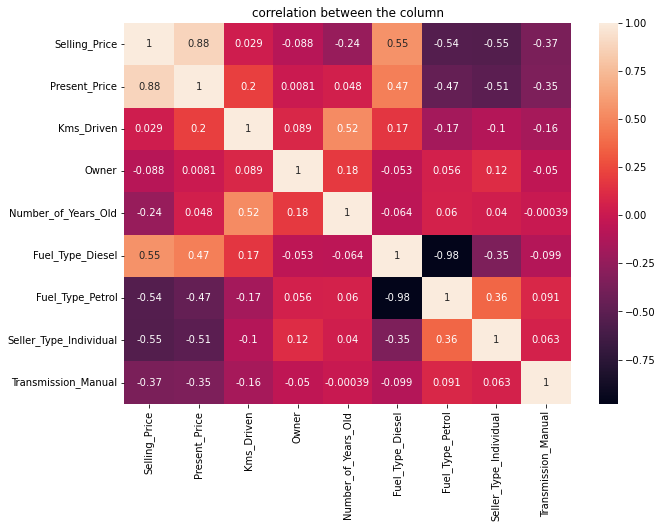

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between the column')
plt.show()

<AxesSubplot:title={'center':'correlation between the present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

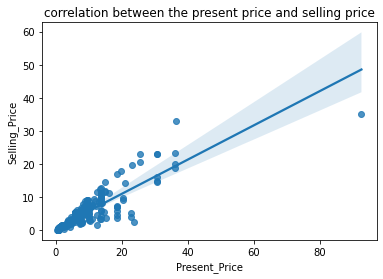

In [17]:
plt.title('correlation between the present price and selling price')
sns.regplot(x='Present_Price' , y='Selling_Price', data=df )


In [18]:

a=df['Selling_Price']
df.drop(['Selling_Price'], axis=1, inplace=True)
df=df.join(a)
df.head()


,Car_Name,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,ritz,5.59,27000,0,8,0,1,0,1,3.35
1,sx4,9.54,43000,0,9,1,0,0,1,4.75
2,ciaz,9.85,6900,0,5,0,1,0,1,7.25
3,wagon r,4.15,5200,0,11,0,1,0,1,2.85
4,swift,6.87,42450,0,8,1,0,0,1,4.60


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [20]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [21]:
X

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,1,0,0,1
297,5.90,60000,0,7,0,1,0,1
298,11.00,87934,0,13,0,1,0,1
299,12.50,9000,0,5,1,0,0,1


In [22]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
model=LinearRegression()

In [26]:
model.fit(X,Y)

LinearRegression()

In [27]:
model.coef_

array([ 4.37174007e-01, -7.01321414e-06, -6.74167769e-01, -3.93084982e-01,
        2.46993529e+00,  6.07657100e-01, -1.12131499e+00, -1.44817240e+00])

In [28]:
model.intercept_

5.581273876806955

In [29]:
model.score(X,Y)

0.8825741581640659

In [30]:
df

,Car_Name,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,ritz,5.59,27000,0,8,0,1,0,1,3.35
1,sx4,9.54,43000,0,9,1,0,0,1,4.75
2,ciaz,9.85,6900,0,5,0,1,0,1,7.25
3,wagon r,4.15,5200,0,11,0,1,0,1,2.85
4,swift,6.87,42450,0,8,1,0,0,1,4.60
...,...,...,...,...,...,...,...,...,...,...
296,city,11.60,33988,0,6,1,0,0,1,9.50
297,brio,5.90,60000,0,7,0,1,0,1,4.00
298,city,11.00,87934,0,13,0,1,0,1,3.35
299,city,12.50,9000,0,5,1,0,0,1,11.50


In [31]:
from joblib import dump, load

In [32]:
dump(model,'model_job')

['model_job']

In [34]:
df.to_excel("Car_Pice_Pred(shubhu).xlsx")
